## Top 20 words of each News category

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, fpgrowth,  association_rules
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1

In [3]:
true_df = pd.read_csv(r"True.csv", sep=',')
true_df['label'] = 1
true_df.sample(5)

,title,text,subject,date,label
9315,California Assembly passes gun control bills,"SACRAMENTO, Calif. (Reuters) - The California ...",politicsNews,"June 2, 2016",1
1789,State Department OKs possible sale to Canada o...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"September 12, 2017",1
21150,At least three dead as Lidia slams Mexico's Lo...,MEXICO CITY (Reuters) - At least three people ...,worldnews,"September 1, 2017",1
18276,Your gilded chariot awaits: Brunei sultan cele...,BANDAR SERI BEGAWAN (Reuters) - Oil-rich Brune...,worldnews,"October 5, 2017",1
11790,Philippine police chief defends deadly drug wa...,MANILA (Reuters) - The police chief of the Phi...,worldnews,"December 20, 2017",1


### Read fake.csv file and label it with 0

In [4]:
fake_df = pd.read_csv(r"Fake.csv", sep=',') 
fake_df['label'] = 0
fake_df.sample(5)

,title,text,subject,date,label
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen 21st Century Wire UPDATE: 1...,Middle-east,"January 27, 2016",0
5047,Trump’s Old Campaign Chair Knifed The Man Who...,"One would think Corey Lewandowski, Trump s for...",News,"August 15, 2016",0
20206,DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...,If you haven t seen Dinesh D Souza s HILLARY ...,left-news,"Jul 28, 2016",0
13683,RACIST OPRAH MAKES SAME MISTAKE…TWICE,"Just remember, the woman who believes Hillary ...",politics,"Jun 16, 2016",0
12983,"WOW! BLACK DALLAS Police Sergeant Sues Obama, ...",Read the list of people and organizations this...,politics,"Sep 18, 2016",0


### Combine true and fake news in one dataframe

In [5]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
36069,"OBAMA GIVES UN Authority To Vet 9,000 “Refugee...",As Obama begins his campaign for UN General Se...,politics,"Jan 14, 2016",0
35295,A YOUNG FATHER EXPLAINS SOCIALISM To His 10 Ye...,The discussion Bret Stephens had with his 10 y...,politics,"May 18, 2016",0
8848,"Donald Trump, Republican Party boost fundraisi...",WASHINGTON (Reuters) - Donald Trump and the Re...,politicsNews,"July 6, 2016",1
32592,PAUL JOSEPH WATSON Is Not Happy About The Air ...,The truth about the air strike on Syria.SHARE:...,politics,"Apr 8, 2017",0
1030,U.S. House passes sanctions on Iran-backed Hez...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"October 25, 2017",1
24020,"Trump Just Met With Airline Execs, RUINS Meet...",Donald Trump has turned yet another meeting in...,News,"February 9, 2017",0
6005,Trump weighs next executive orders on national...,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,politicsNews,"January 26, 2017",1
12579,Russia urges India to line up behind China's B...,NEW DELHI (Reuters) - Russia threw its weight ...,worldnews,"December 11, 2017",1
9767,Clinton sole presidential hopeful to attend As...,NEW YORK (Reuters) - U.S. Democrat Hillary Cli...,politicsNews,"April 27, 2016",1
17281,Turkey's military says two Turkish soldiers ki...,ANKARA (Reuters) - Two Turkish soldiers were k...,worldnews,"October 17, 2017",1


### Partition the Dataframe into sub-dataframes according to the news subject

In [14]:
df_groups = all_news_df.groupby('subject')
print("The available subjects are:")
for name, group in df_groups:
    print(name)



The available subjects are:
Government News
Middle-east
News
US_News
left-news
politics
politicsNews
worldnews


### Produce a Frequency-Term Table out of the datafarame
### Produce Frequent Itemsets
### plot the top 20 popular words

In [17]:

def getTop20WordsOfNewsSubject(name, group):
    vectorizer = CountVectorizer(stop_words='english', binary=True)
    matrix = vectorizer.fit_transform(group['title'] + ' ' + group['text'])
    sparse_df = pd.DataFrame.sparse.from_spmatrix(
        matrix, 
        columns=vectorizer.get_feature_names_out()
    )
    freq_words = apriori(sparse_df, min_support=0.1, use_colnames=True, max_len=1)
    frequent_words_sorted = freq_words.sort_values(by='support', ascending=False)
    top_20 = frequent_words_sorted.head(20)
    top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))
    plt.figure(figsize=(10, 8))
    plt.barh(top_20['itemsets_str'], top_20['support'])
    plt.xlabel('Support')
    plt.ylabel('Words')
    plt.title(f'Top 20 Frequent Words of News with ({name}) subject')
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


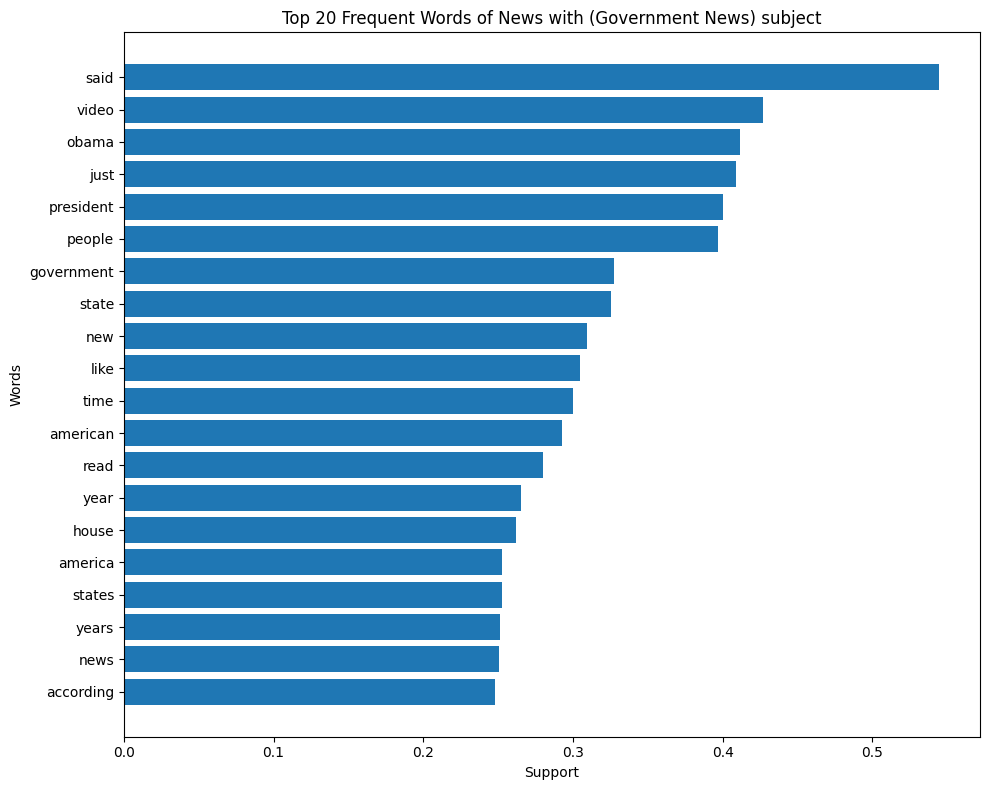

In [20]:
getTop20WordsOfNewsSubject("Government News", df_groups.get_group("Government News"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


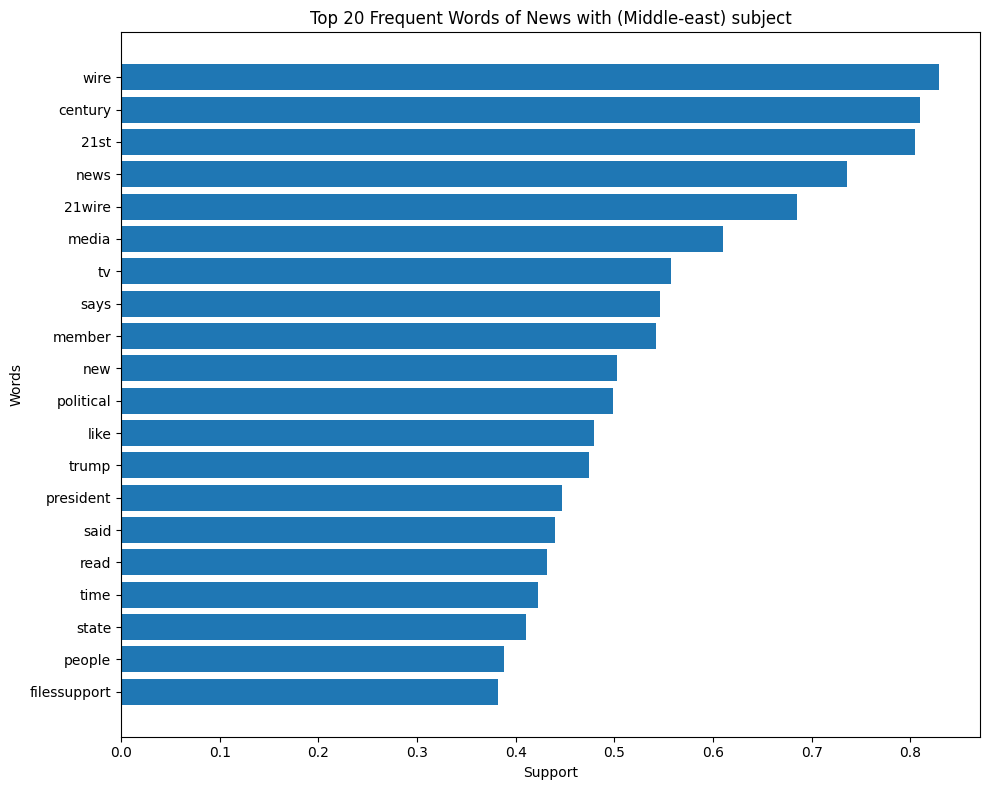

In [21]:
getTop20WordsOfNewsSubject("Middle-east", df_groups.get_group("Middle-east"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


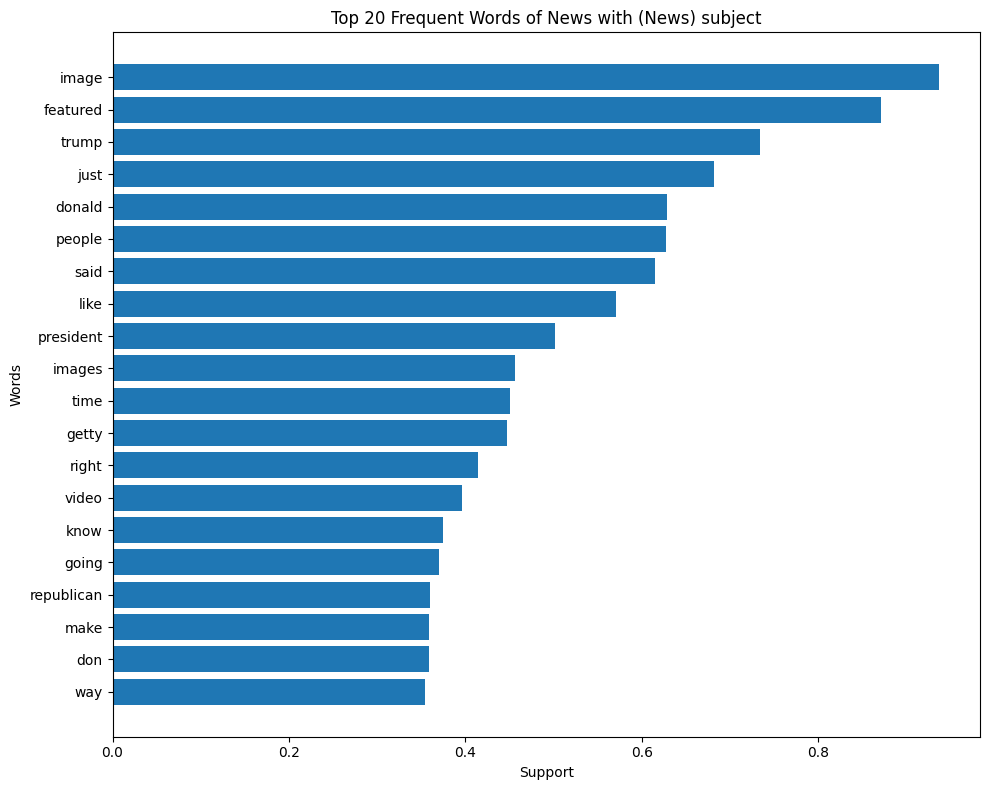

In [22]:
getTop20WordsOfNewsSubject("News", df_groups.get_group("News"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


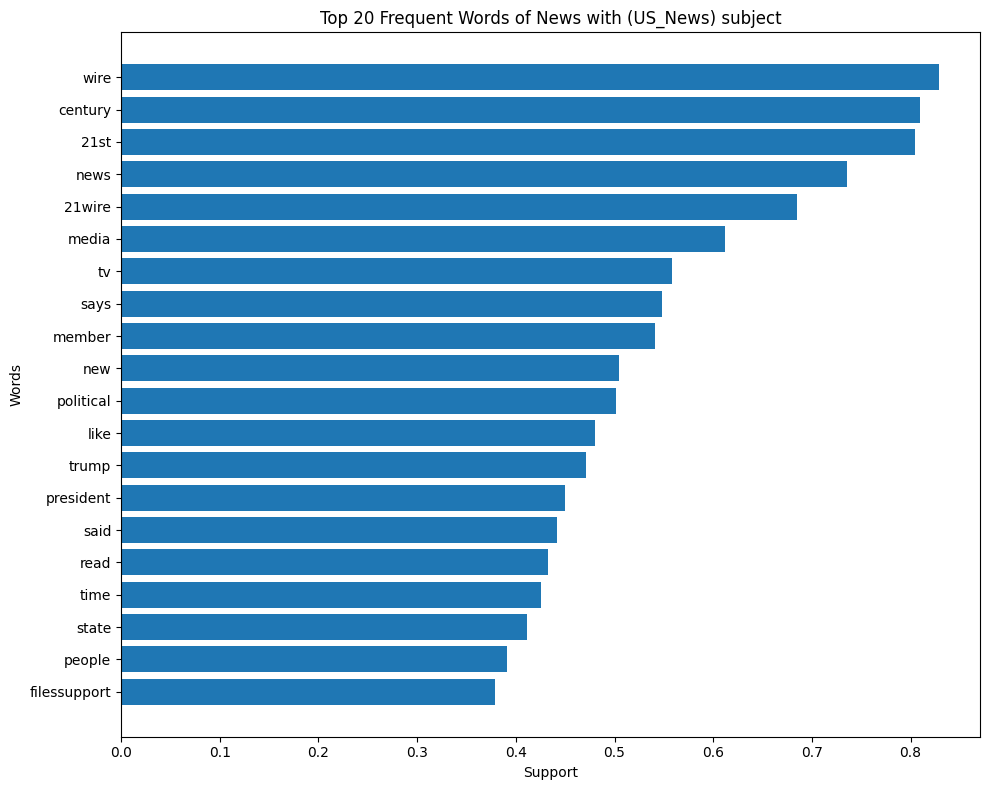

In [23]:
getTop20WordsOfNewsSubject("US_News", df_groups.get_group("US_News"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


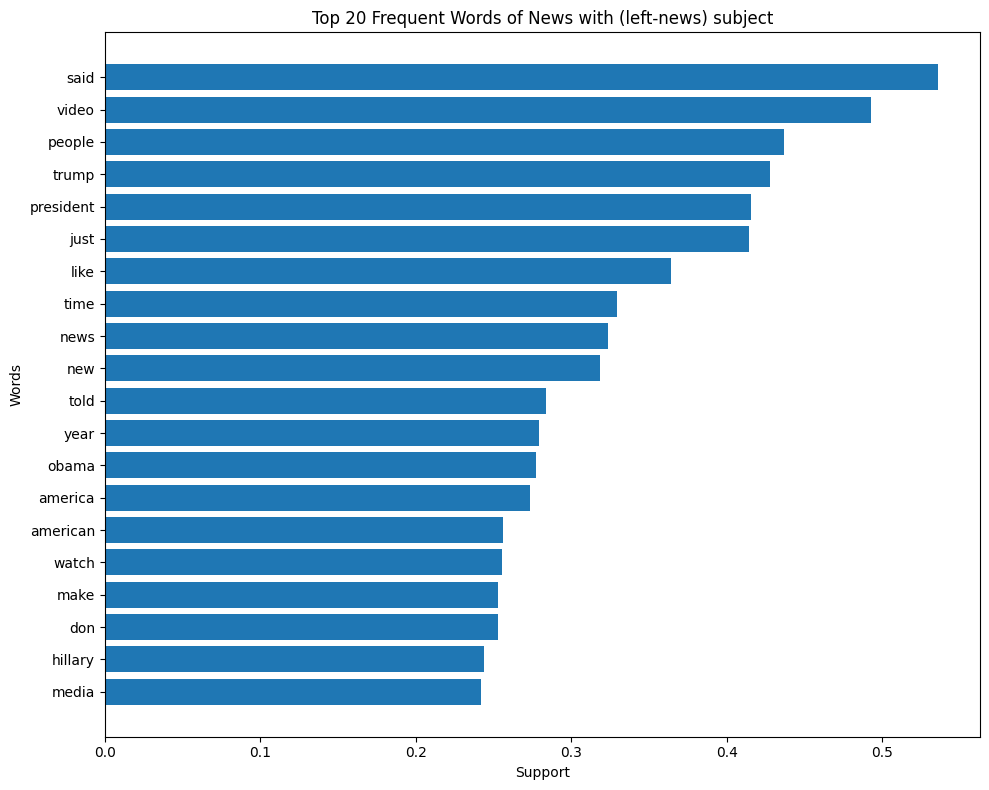

In [24]:
getTop20WordsOfNewsSubject("left-news", df_groups.get_group("left-news"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


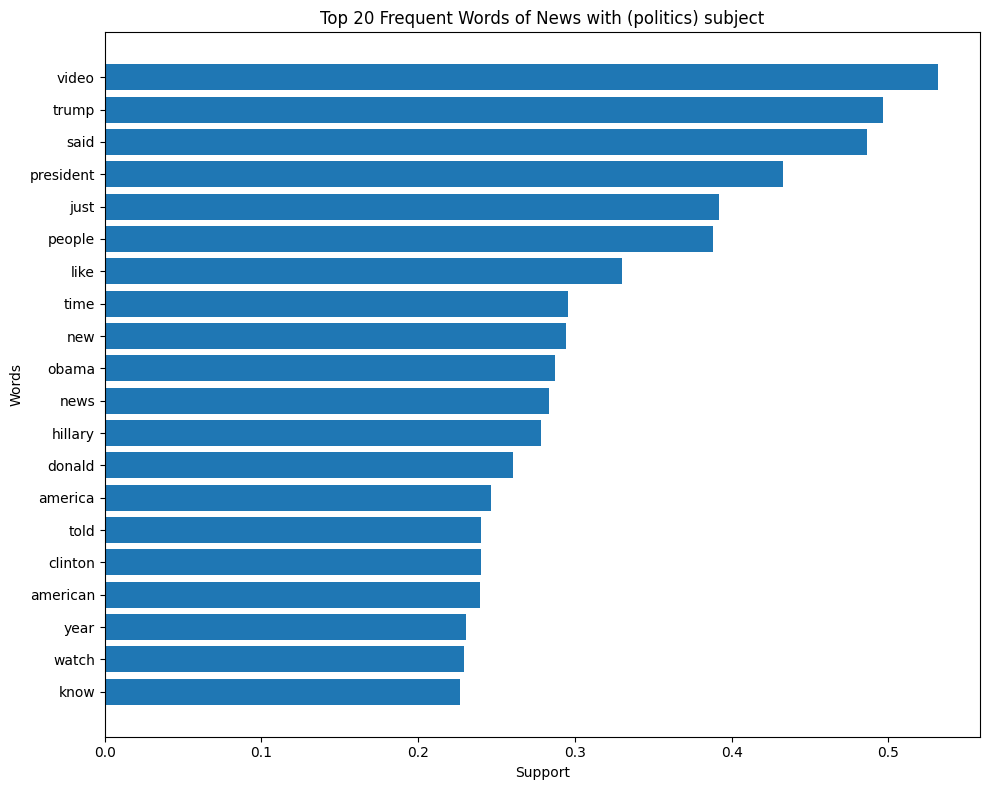

In [25]:
getTop20WordsOfNewsSubject("politics", df_groups.get_group("politics"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


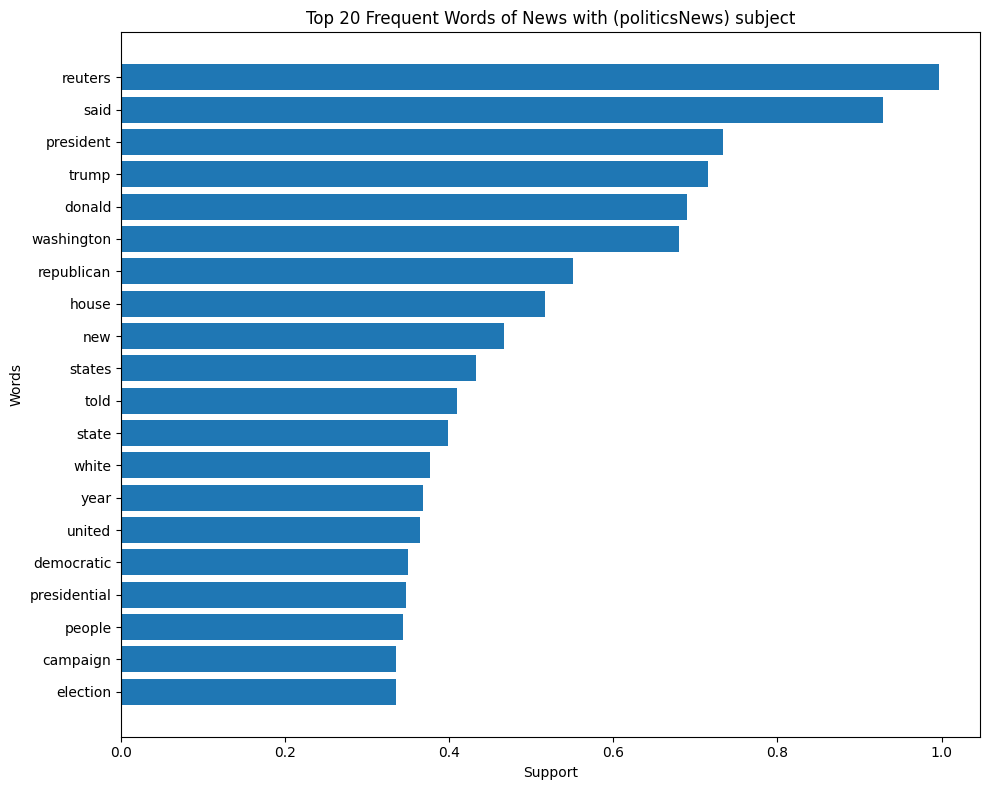

In [26]:
getTop20WordsOfNewsSubject("politicsNews", df_groups.get_group("politicsNews"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


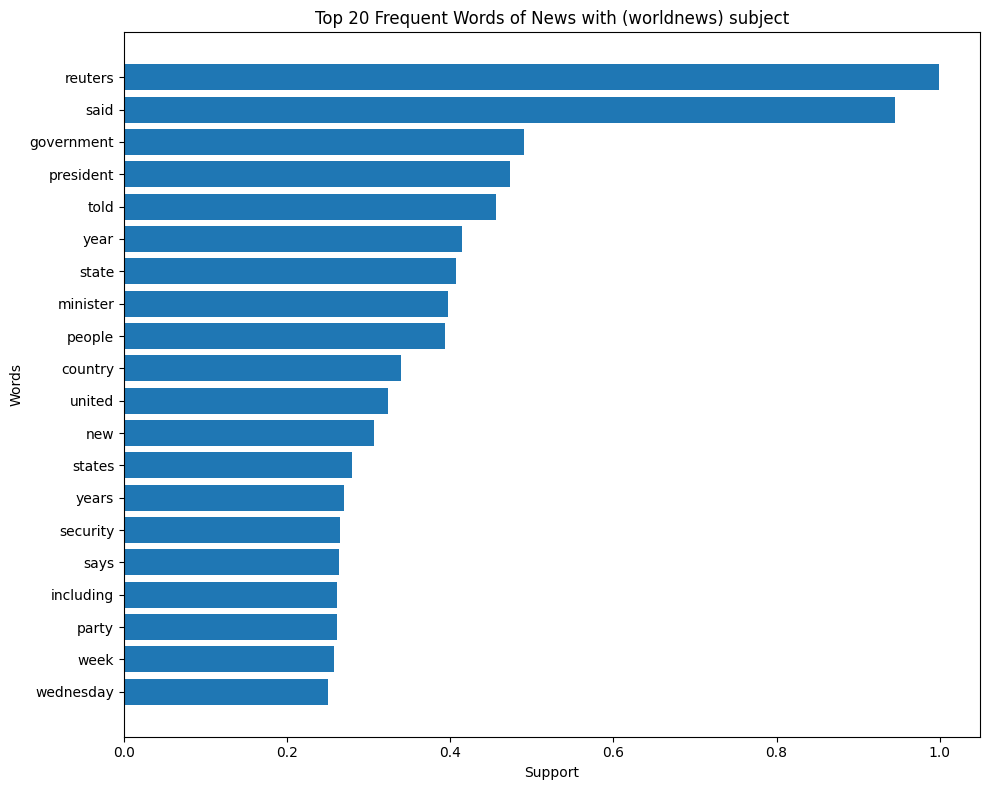

In [27]:
getTop20WordsOfNewsSubject("worldnews", df_groups.get_group("worldnews"))

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ibrahima\AppData\Local\Temp\ipykernel_2580\1418746569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


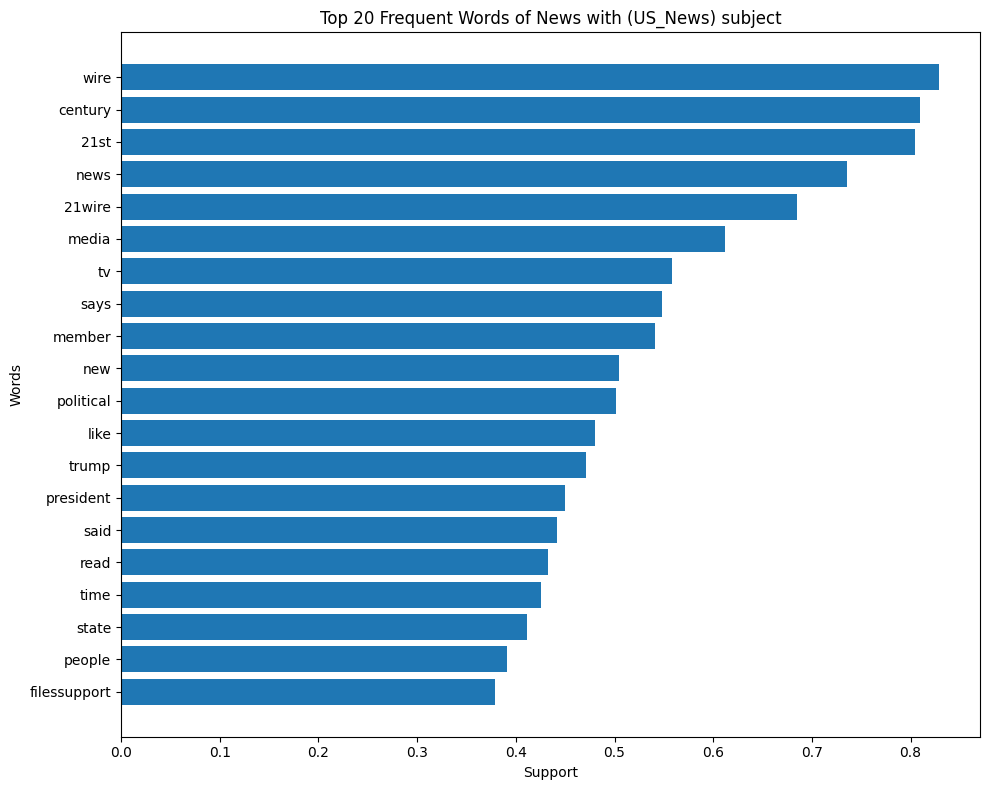

In [28]:
getTop20WordsOfNewsSubject("US_News", df_groups.get_group("US_News"))